Confusion Matrix for Training Data:
True Positive: 247
True Negative: 143
False Positive: 6
False Negative: 2

Confusion Matrix for Testing Data:
True Positive: 107
True Negative: 62
False Positive: 1
False Negative: 1

Sensitivity for Training Data: 0.9919678714859438
Specificity for Training Data: 0.959731543624161
Sensitivity for Testing Data: 0.9907407407407407
Specificity for Testing Data: 0.9841269841269841


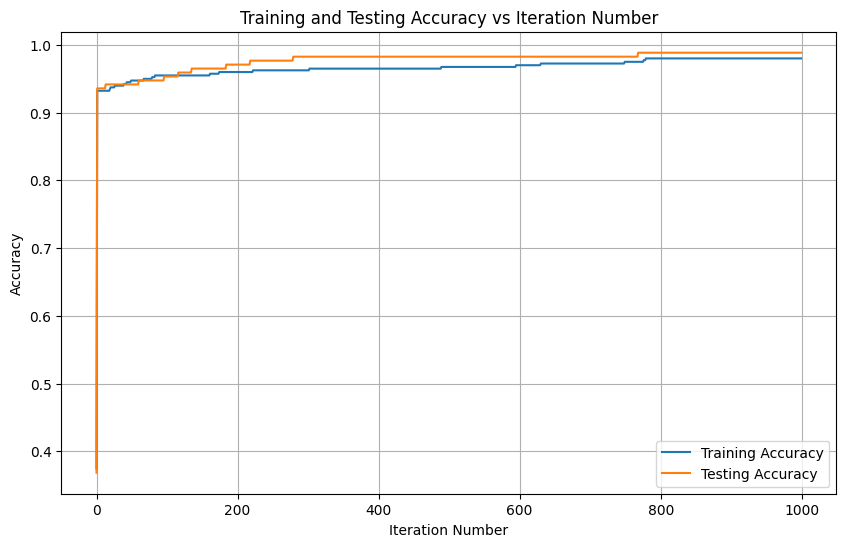

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Define the gradient descent function for logistic regression
def gradient_descent(X, y, alpha, iterations):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(iterations):
        h = logistic(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
    return theta

# Define a function to predict labels
def predict(X, theta):
    h = logistic(np.dot(X, theta))
    return np.round(h)

# Load the breast cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets (70:30 ratio)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add intercept term to X_train_scaled and X_test_scaled
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Initialize parameters
alpha = 0.01
iterations = 1000

# Train the logistic regression model
theta = gradient_descent(X_train_scaled, y_train, alpha, iterations)

# Make predictions on training and testing data
y_train_pred = predict(X_train_scaled, theta)
y_test_pred = predict(X_test_scaled, theta)

# Compute confusion matrix, sensitivity, and specificity
def confusion_matrix(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    return tp, tn, fp, fn

def sensitivity_specificity(y_true, y_pred):
    tp, tn, fp, fn = confusion_matrix(y_true, y_pred)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

tp_train, tn_train, fp_train, fn_train = confusion_matrix(y_train, y_train_pred)
tp_test, tn_test, fp_test, fn_test = confusion_matrix(y_test, y_test_pred)

sensitivity_train, specificity_train = sensitivity_specificity(y_train, y_train_pred)
sensitivity_test, specificity_test = sensitivity_specificity(y_test, y_test_pred)

print("Confusion Matrix for Training Data:")
print("True Positive:", tp_train)
print("True Negative:", tn_train)
print("False Positive:", fp_train)
print("False Negative:", fn_train)
print("")

print("Confusion Matrix for Testing Data:")
print("True Positive:", tp_test)
print("True Negative:", tn_test)
print("False Positive:", fp_test)
print("False Negative:", fn_test)
print("")

print("Sensitivity for Training Data:", sensitivity_train)
print("Specificity for Training Data:", specificity_train)
print("Sensitivity for Testing Data:", sensitivity_test)
print("Specificity for Testing Data:", specificity_test)

# Store training and testing accuracy for each iteration
train_accuracy_list = []
test_accuracy_list = []

for i in range(iterations):
    theta = gradient_descent(X_train_scaled, y_train, alpha, i)
    y_train_pred = predict(X_train_scaled, theta)
    y_test_pred = predict(X_test_scaled, theta)
    train_accuracy = np.mean(y_train_pred == y_train)
    test_accuracy = np.mean(y_test_pred == y_test)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

# Plotting training and testing accuracy vs iteration no
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_accuracy_list, label='Training Accuracy')
plt.plot(range(iterations), test_accuracy_list, label='Testing Accuracy')
plt.title('Training and Testing Accuracy vs Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
